<a href="https://colab.research.google.com/github/emrllh/My_works/blob/main/MNISt_DATASET_FOR_DEEP_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MNISt DATASET FOR DEEP LEARNING

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Import tensorflow and tensorhub
import tensorboard as tb
import tensorflow as tf
import keras

In [ ]:
#To be able to connect the files on drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#define X and y training
(X_train_full,y_train_full),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#shape of X and y
X_train_full.shape,y_train_full.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
X_train_full.dtype,X_test.dtype

(dtype('uint8'), dtype('uint8'))

In [ ]:
#Set our training and create the validation set
X_train,X_val= X_train_full[5000:]/255.0,X_train_full[:5000]/255.0
y_train,y_val=y_train_full[5000:],y_train_full[:5000]
X_test=X_test/255.0

In [ ]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((55000, 28, 28), (55000,), (5000, 28, 28), (5000,))

In [ ]:
X_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
#Import image library
from IPython.display import Image
Image(X_train[0])

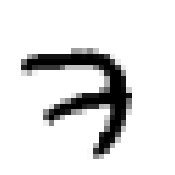

In [ ]:
#Showing the first image with matloblib
plt.figure(figsize=(2,3))
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

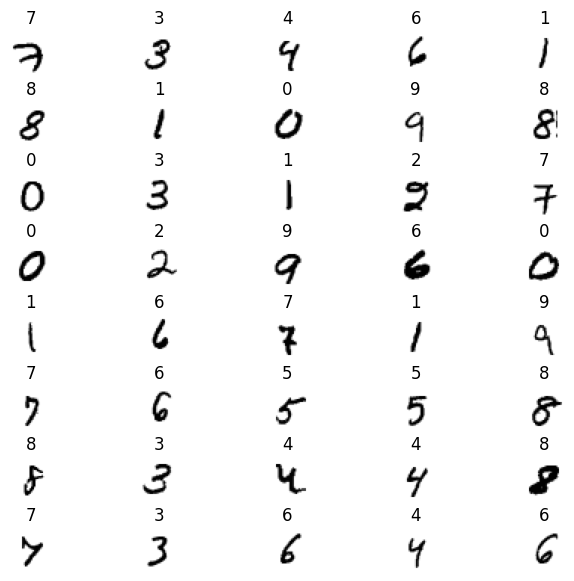

In [ ]:
#setup figure
plt.figure(figsize=(8,7))
#create a loop to show images
for i in range(40):
  #create a subplot size of 8 rows and 5 columns
  plt.subplot(8,5,i+1)
  # show images as black and white
  plt.imshow(X_train[i],cmap='binary')
  #show image index with title
  plt.title(y_train[i])
  # turn off the axis so not being so busy
  plt.axis('off')
#space for image itself and title of it
plt.subplots_adjust(hspace=0.7)
plt.show()

In [ ]:
#Creating model
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]), #flatten the input
    tf.keras.layers.Dense(300,activation='relu'), #the first layer has 300 neurons
    tf.keras.layers.Dense(100,activation='relu'), #the secon input has 100 neurons
    tf.keras.layers.Dense(10,activation='softmax') #as the output is multiclass classification we using softmax for probability
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


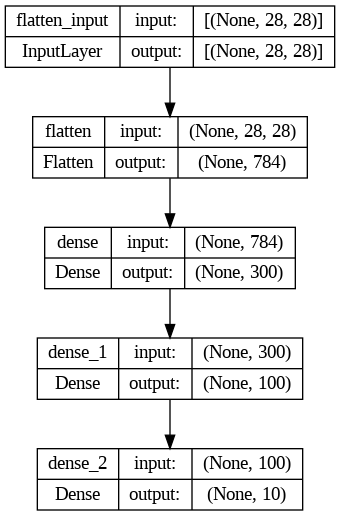

In [ ]:
#Displaying model architecture
tf.keras.utils.plot_model(model,'my_first_model.png',show_shapes=True)

In [ ]:
model.layers

In [ ]:
#we can use names for each of layers if we used lots of them but here only have 3 layers
hiden1=model.layers[1]
hiden1.name

'dense'

In [ ]:
weights,biases=hiden1.get_weights()
weights,weights.shape

(array([[ 0.07362488,  0.03127893, -0.04598271, ..., -0.01943748,
         -0.02175982,  0.03595275],
        [ 0.01185575, -0.06299751,  0.06914735, ...,  0.01773434,
         -0.05016201, -0.06261784],
        [-0.00767969,  0.05925889, -0.00395435, ..., -0.03499125,
         -0.05319508, -0.0727216 ],
        ...,
        [ 0.02094129,  0.0301903 ,  0.00424281, ...,  0.06387006,
          0.02121706,  0.00229723],
        [-0.04952332, -0.00934228, -0.07123327, ...,  0.00957695,
          0.05592115, -0.06093311],
        [-0.03540772,  0.06143504, -0.04886761, ...,  0.01975573,
         -0.00035559, -0.04603931]], dtype=float32),
 (784, 300))

In [ ]:
biases, biases.shape

(array([ 6.34003654e-02, -4.32623811e-02,  3.97831127e-02,  4.34765741e-02,
         8.02489521e-04,  4.17999029e-02,  1.88677770e-03, -9.58955288e-03,
         1.33741340e-02,  1.33313900e-02,  1.66411826e-03,  4.34994698e-03,
        -6.77028438e-03, -1.23404972e-02,  5.39222881e-02,  2.20973324e-02,
         1.22315763e-03,  2.34284233e-02, -7.36073591e-03,  4.45919903e-03,
         7.15022581e-03, -5.71913086e-03, -6.42764475e-03, -1.65719900e-03,
         2.37941723e-02,  5.87051408e-03,  8.16069730e-03,  6.63145969e-04,
        -4.32318123e-03,  5.15248254e-02,  2.59723496e-02, -2.01757811e-02,
         1.46791153e-02,  4.91032656e-03,  2.10221708e-02,  3.42051610e-02,
         1.16369314e-02, -1.86609793e-02, -1.99427381e-02,  1.40479850e-02,
        -4.17146692e-03, -3.64738610e-03, -7.78735103e-03, -4.04867111e-04,
        -1.67300813e-02,  4.13433239e-02,  1.58856399e-02,  2.55936664e-02,
         3.47718522e-02,  4.30083973e-03,  1.49727985e-02,  1.75022632e-02,
        -3.9

In [ ]:
#select the optimizer
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001)

#compile the model
model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",
              metrics=['accuracy'],
              )

## Creating Callback
Callback are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stop improving.

To set up a TensorBoard callback we neen to do 3 thins

- Load the TensorBoard notebook extension
- Create a TensorBoard callback whick is able to save logs to a directory and pass it to our `model.fit()` function
- Visualize our model training logs with the `%tensorboard` magic function.

Creating call back using `ModelCheckpoint()` function and  also we set `save_best_only=True` to save the model when the validation set is the best so far

###Creating TensorBoard

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
#import datetime
import datetime
import os
 #create a log directory for storing TensorBoard logs
logdir='/content/drive/MyDrive/Mnist/log'+datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensor_board=tf.keras.callbacks.TensorBoard(logdir)


In [ ]:
#Creating callback to just save the most important steps
 #training will run for patience epochs and restore weights from the best epoch in that set.
checkpoint_cb=keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Mnist/checkpoint',
                                              verbose=0,
                                              monitor='val_loss',
                                              save_freq='epoch',
                                             save_best_only=True)

In [ ]:
#Creating early stopping
#l changed patience from 20 to 0 as the model not imporove so l dont want the model to try more
# Baseline to None is stating that the model's accuracy starts no top limit
early_stopping=keras.callbacks.EarlyStopping(monitor='val_loss',
                                             verbose=1,patience=0,baseline=None,)

###For Optimal Learning Rate :

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

1-Fix Learning Rate Approach:

Fix Learning is the way we tried many different learning rates and then find the optimal learning a1,a2,a3 and a4.

Make sure to set verbose=2 in the `model.fit()` method to print values for each epochs
  
2- Systematic Approach

In [ ]:
#Fitting the model with a1 learning rate

history=model.fit(X_train,y_train,epochs=100,
                  validation_data=(X_val,y_val),verbose=2,
                  callbacks=[checkpoint_cb,early_stopping,tensor_board])

Epoch 1/100
1719/1719 - 9s - loss: 1.7441 - accuracy: 0.5633 - val_loss: 1.1646 - val_accuracy: 0.7866 - 9s/epoch - 5ms/step
Epoch 2/100
1719/1719 - 7s - loss: 0.8738 - accuracy: 0.8227 - val_loss: 0.6668 - val_accuracy: 0.8474 - 7s/epoch - 4ms/step
Epoch 3/100
1719/1719 - 7s - loss: 0.5893 - accuracy: 0.8605 - val_loss: 0.5089 - val_accuracy: 0.8726 - 7s/epoch - 4ms/step
Epoch 4/100
1719/1719 - 7s - loss: 0.4826 - accuracy: 0.8771 - val_loss: 0.4338 - val_accuracy: 0.8880 - 7s/epoch - 4ms/step
Epoch 5/100
1719/1719 - 8s - loss: 0.4268 - accuracy: 0.8868 - val_loss: 0.3902 - val_accuracy: 0.8958 - 8s/epoch - 4ms/step
Epoch 6/100
1719/1719 - 6s - loss: 0.3918 - accuracy: 0.8935 - val_loss: 0.3610 - val_accuracy: 0.9024 - 6s/epoch - 4ms/step
Epoch 7/100
1719/1719 - 8s - loss: 0.3672 - accuracy: 0.8986 - val_loss: 0.3392 - val_accuracy: 0.9056 - 8s/epoch - 5ms/step
Epoch 8/100
1719/1719 - 6s - loss: 0.3484 - accuracy: 0.9027 - val_loss: 0.3231 - val_accuracy: 0.9104 - 6s/epoch - 4ms/step


Our model didnt recognise the early_stopping and the model did go through all epochs so after some changes lets try again to see if the early stopping is functioning

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Lets fit the model again and see if the early stopping will work this time
# Also change the learning rate, learning_rate=0.001
history1=model.fit(X_train,y_train,
          validation_data=(X_val,y_val),epochs=30,verbose=2,
          callbacks=[checkpoint_cb,early_stopping,tensor_board])

Epoch 1/30
1719/1719 - 6s - loss: 0.0944 - accuracy: 0.9740 - val_loss: 0.1068 - val_accuracy: 0.9698 - 6s/epoch - 4ms/step
Epoch 2/30
1719/1719 - 8s - loss: 0.0936 - accuracy: 0.9744 - val_loss: 0.1061 - val_accuracy: 0.9700 - 8s/epoch - 5ms/step
Epoch 3/30
1719/1719 - 6s - loss: 0.0929 - accuracy: 0.9746 - val_loss: 0.1055 - val_accuracy: 0.9698 - 6s/epoch - 4ms/step
Epoch 4/30
1719/1719 - 8s - loss: 0.0920 - accuracy: 0.9747 - val_loss: 0.1054 - val_accuracy: 0.9700 - 8s/epoch - 5ms/step
Epoch 5/30
1719/1719 - 6s - loss: 0.0913 - accuracy: 0.9748 - val_loss: 0.1042 - val_accuracy: 0.9702 - 6s/epoch - 3ms/step
Epoch 6/30
1719/1719 - 8s - loss: 0.0904 - accuracy: 0.9753 - val_loss: 0.1040 - val_accuracy: 0.9698 - 8s/epoch - 5ms/step
Epoch 7/30
1719/1719 - 6s - loss: 0.0898 - accuracy: 0.9756 - val_loss: 0.1033 - val_accuracy: 0.9702 - 6s/epoch - 4ms/step
Epoch 8/30
1719/1719 - 8s - loss: 0.0890 - accuracy: 0.9756 - val_loss: 0.1033 - val_accuracy: 0.9710 - 8s/epoch - 4ms/step
Epoch 9/

Our model reach to 0.989 and we can see the ` val_loss: 0.0758 `drop and then jump to `val_loss: 0.0759` then early_stopping stop the model. Also changins some parameters in early stopping made it trigger the model to stop

Here l tried to different models with the same data and the first model used all 100 epochs and early stopping didnt triger and and `val_loss` constantly dropping but the accuracy wasnt
improving? `accuracy: 0.9736 `
The second with 30 epochs model imporoved better then the first one and accuracy reached `0.9778` and the early stopping did work on 17.epochs.



To stop the carry on with the `history` model l used the piece of code before `history1`

  tf.keras.backend.clear_session()

  np.random.seed(42)

  tf.random.set_seed(42)

My Roadmap

- How to see checkpoint
- See learning curves using `TensorBoard`
- Plot `loss`vs `weights`
- `save_model`,`load_model` and `evaluate_model`

In [ ]:
history.params

{'verbose': 2, 'epochs': 100, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [ ]:
history.history

{'loss': [1.744076132774353,
  0.8738306164741516,
  0.5893331170082092,
  0.48263177275657654,
  0.4267914891242981,
  0.3918168544769287,
  0.3671795427799225,
  0.34837067127227783,
  0.33337000012397766,
  0.32085493206977844,
  0.31013184785842896,
  0.30059507489204407,
  0.29209771752357483,
  0.2844966948032379,
  0.2774147391319275,
  0.2708931863307953,
  0.26501157879829407,
  0.25917741656303406,
  0.25397321581840515,
  0.2488251030445099,
  0.24410909414291382,
  0.23935455083847046,
  0.23507088422775269,
  0.23078559339046478,
  0.2266276776790619,
  0.22266885638237,
  0.2191258668899536,
  0.21538887917995453,
  0.21185556054115295,
  0.20861050486564636,
  0.2052799016237259,
  0.20221294462680817,
  0.19898048043251038,
  0.19611339271068573,
  0.1932186484336853,
  0.1904541403055191,
  0.18770918250083923,
  0.18499591946601868,
  0.18256732821464539,
  0.18008799850940704,
  0.177605539560318,
  0.17525368928909302,
  0.17292514443397522,
  0.17063717544078827,
 

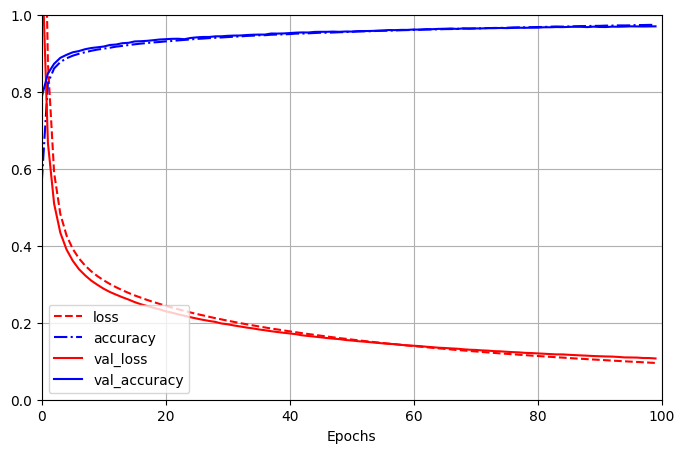

In [ ]:

pd.DataFrame(history.history).plot(
    figsize=(8,5),xlim=[0,100],ylim=[0,1],grid=True,xlabel='Epochs',
    style=['r--','b-.','r-','b-'])

plt.legend(loc='lower left')
plt.savefig('my_figs')
plt.show()

In [ ]:
# evaluate the model
_, train_mse = model.evaluate(trainX, trainy, verbose=0)
_, test_mse = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot mse during training
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(history.history['mean_squared_error'], label='train')
pyplot.plot(history.history['val_mean_squared_error'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
#evaluate the model
_train=model.evaluate(X_train,y_train)
_test=model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1010 - accuracy: 0.9706


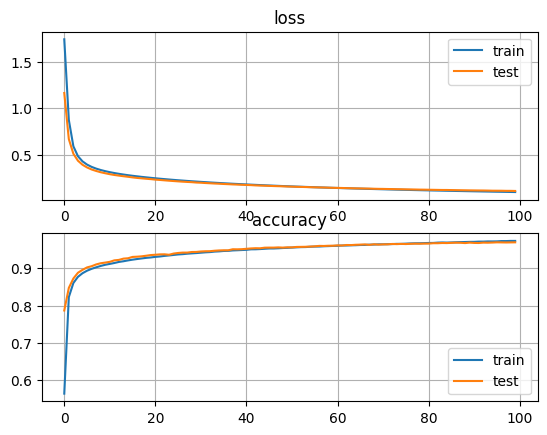

In [ ]:
plt.subplot(211)
plt.title('loss')
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.grid('True')
plt.legend()

plt.subplot(212)
plt.title('accuracy')
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.grid('True')
plt.legend()
plt.show()

In [ ]:
_test

[0.10101523995399475, 0.9706000089645386]